<a href="https://colab.research.google.com/github/ananyas168/ML/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing import packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
!pip install scikit-plot

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Others/creditcard.csv")

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


so there arn't any null values we can process.
Let's look into the dataset...about the different classes and feature.

In [ ]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,-25.0,-5.0,-19.0,-6.0,-19.0,-4.0,-14.0,-25.0,-9.0,-7.0,-54.0,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,24.0,12.0,8.0,7.0,11.0,9.0,17.0,9.0,5.0,6.0,39.0,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


In [ ]:
print('non-fraud in %:', ((len(df[df['Class']==0]))/df.shape[0])*100)

non-fraud in %: 99.82725143693798


In [ ]:
print('fraud in %:', ((len(df[df['Class']==1]))/df.shape[0])*100)

fraud in %: 0.1727485630620034


so , we can see that there is perfect class imbalance,
to solve this we will try oversampling and undersamplying, but lets first see the outcome of the prediction with this imbalanced data:

size of original data: 284807


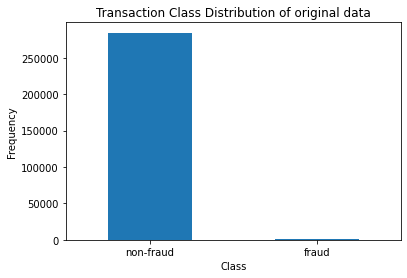

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution of original data")
plt.xticks(range(2), ['non-fraud','fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency");
print('size of original data:', len(df))


In [ ]:
X= df.drop(['Class','Time'], axis=1)
Y= df['Class']

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
import scikitplot as skplt

FOR LOGISTIC REGRESSION ORIGINAL DATA:
accuracy_score:0.9991807403766253

f1 score:0.7033898305084745

Cross-Validation Accuracy Scores:[0.9989467  0.99901692 0.99908714 0.99908714 0.99957865 0.99894663
 0.99964888 0.99908708 0.99929775 0.9994382  0.99908708 0.99908708
 0.99908708 0.99894663]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.82      0.61      0.70       135

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix


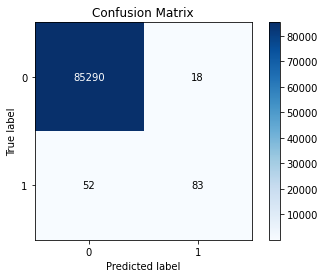

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression()
log_reg1.fit(x_train, y_train)
y_pred_1 = log_reg1.predict(x_test)
print('FOR LOGISTIC REGRESSION ORIGINAL DATA:')
print("accuracy_score:{}\n".format(accuracy_score(y_test, y_pred_1)))
print("f1 score:{}\n".format(f1_score(y_test,y_pred_1)))
scores_1= cross_val_score(log_reg1, x_train, y_train, cv=14)
print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(y_test,y_pred_1))
import scikitplot as skplt
print('confusion matrix')
skplt.metrics.plot_confusion_matrix(y_test,y_pred_1)

Area under the curve : 0.807302
Average precision-recall score RF: 0.5058524505821835


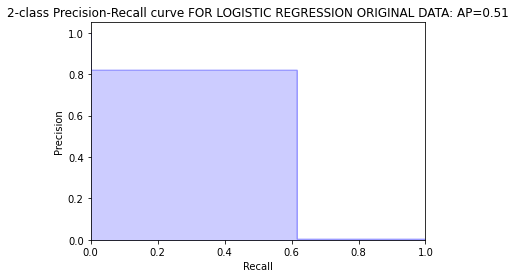

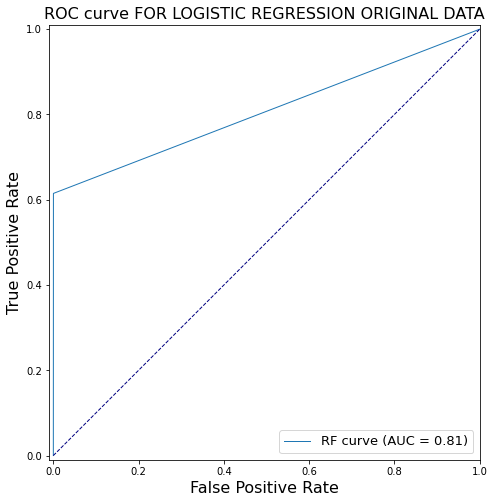

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(y_test,y_pred_1)
print("Area under the curve : %f" % (roc_auc_score(y_test,y_pred_1)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(y_test,y_pred_1)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR LOGISTIC REGRESSION ORIGINAL DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test,y_pred_1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR LOGISTIC REGRESSION ORIGINAL DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

as we can see from above figure:
Thus, although the accuracy was excellent, the algorithm wrongly classified about 4 out of 10 fraudulent transactions.

Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model. Initially, a method should be applied to balance the data before taking into account any performance evaluation metrics.

Initially, a method should be applied to balance the data before taking into account any performance evaluation metrics.

so in  the next cells we apply undersamplying to see the model prediction

BELOW IS THE METHOD TO PRODUCE BALANCED UNDERSAMPLE DATA:

In [ ]:
fraud_rec = len(df[df.Class == 1])
print(fraud_rec)
fraud_indices = df[df.Class == 1].index
not_fraud_indices = df[df.Class == 0].index
under_sample_indices = np.random.choice(not_fraud_indices, fraud_rec, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.drop(['Class','Time'], axis=1)
Y_undersampled = df_undersampled['Class']
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

492


size of undersampled_data: 984


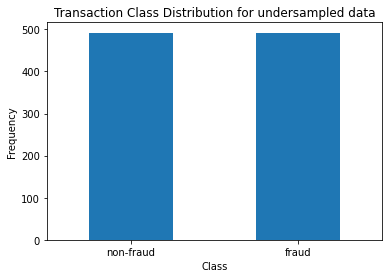

In [ ]:
count_classes = pd.value_counts(df_undersampled['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution for undersampled data")
plt.xticks(range(2), ['non-fraud','fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
print('size of undersampled_data:', len(df_undersampled))


In [ ]:
df_undersampled 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144465,86145.0,1.003419,-1.462467,0.508759,-0.622205,-1.452351,0.036928,-1.002363,0.171619,-0.081265,0.537632,-0.886861,-1.787055,-1.620120,-0.002922,1.648652,1.451305,0.275511,-0.853037,0.006075,0.325187,0.466363,0.815398,-0.275238,-0.429023,0.283102,-0.001611,0.004800,0.045553,199.00,0
193773,130282.0,-1.956324,1.089627,-2.026201,1.077582,-0.273602,-0.517162,1.191911,0.710493,-1.740012,-0.468630,0.183535,0.971684,0.488156,1.794382,-0.382198,-0.110257,-0.069324,0.549927,0.996092,-0.516109,0.375612,0.854339,-0.158323,-0.275952,-0.183556,-0.446178,-0.182073,-0.307899,200.00,0
65113,51434.0,-0.705168,1.050057,1.308228,0.872214,-0.378911,0.359449,-0.278235,0.693823,0.280249,-0.427156,-2.132090,-0.637205,-0.856707,0.112545,0.336426,-0.029165,-0.056046,0.735221,0.928866,-0.021791,0.112440,0.526342,-0.317680,-0.570962,0.075716,-0.103511,0.308042,0.137846,1.00,0
132619,80054.0,1.410737,-0.879178,-1.114539,-1.614882,1.401257,3.447835,-1.105634,0.825813,-0.577795,0.542188,-0.366041,-0.506025,0.000744,-0.321970,-0.299048,0.905380,0.180710,-1.320449,1.305314,0.210092,-0.062680,-0.283887,-0.085985,1.031545,0.709740,-0.231161,0.012483,0.009927,29.70,0


In [ ]:
X_undersampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144465,1.003419,-1.462467,0.508759,-0.622205,-1.452351,0.036928,-1.002363,0.171619,-0.081265,0.537632,-0.886861,-1.787055,-1.620120,-0.002922,1.648652,1.451305,0.275511,-0.853037,0.006075,0.325187,0.466363,0.815398,-0.275238,-0.429023,0.283102,-0.001611,0.004800,0.045553,199.00
193773,-1.956324,1.089627,-2.026201,1.077582,-0.273602,-0.517162,1.191911,0.710493,-1.740012,-0.468630,0.183535,0.971684,0.488156,1.794382,-0.382198,-0.110257,-0.069324,0.549927,0.996092,-0.516109,0.375612,0.854339,-0.158323,-0.275952,-0.183556,-0.446178,-0.182073,-0.307899,200.00
65113,-0.705168,1.050057,1.308228,0.872214,-0.378911,0.359449,-0.278235,0.693823,0.280249,-0.427156,-2.132090,-0.637205,-0.856707,0.112545,0.336426,-0.029165,-0.056046,0.735221,0.928866,-0.021791,0.112440,0.526342,-0.317680,-0.570962,0.075716,-0.103511,0.308042,0.137846,1.00
132619,1.410737,-0.879178,-1.114539,-1.614882,1.401257,3.447835,-1.105634,0.825813,-0.577795,0.542188,-0.366041,-0.506025,0.000744,-0.321970,-0.299048,0.905380,0.180710,-1.320449,1.305314,0.210092,-0.062680,-0.283887,-0.085985,1.031545,0.709740,-0.231161,0.012483,0.009927,29.70


FOR LOGISTIC REGRESSION UNDERSAMPLED DATA:
accuracy_score:0.9358108108108109

f1 score:0.9368770764119602

Cross-Validation Accuracy Scores:[0.88       0.9        0.95918367 0.93877551 0.97959184 0.91836735
 0.95918367 0.91836735 0.95918367 0.97959184 0.89795918 0.97959184
 0.91836735 0.97959184]

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       143
           1       0.95      0.92      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



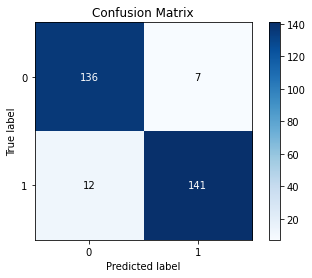

In [ ]:
log_reg_undersampled = LogisticRegression()
log_reg_undersampled.fit(X_undersampled_train, Y_undersampled_train)
y_pred_2 = log_reg_undersampled.predict(X_undersampled_test)
print('FOR LOGISTIC REGRESSION UNDERSAMPLED DATA:')
print("accuracy_score:{}\n".format(accuracy_score(Y_undersampled_test, y_pred_2)))
print("f1 score:{}\n".format(f1_score(Y_undersampled_test,y_pred_2)))
scores_1= cross_val_score(log_reg_undersampled, X_undersampled_train, Y_undersampled_train, cv=14)
print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(Y_undersampled_test,y_pred_2))
skplt.metrics.plot_confusion_matrix(Y_undersampled_test,y_pred_2)

Area under the curve : 0.936309
Average precision-recall score RF: 0.9185214626391097


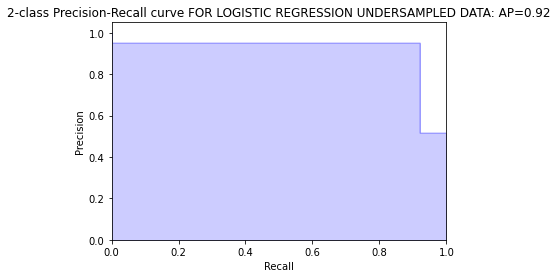

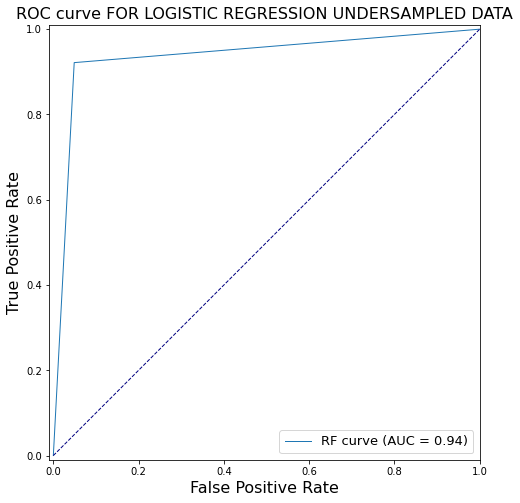

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_undersampled_test, y_pred_2)
print("Area under the curve : %f" % (roc_auc_score(Y_undersampled_test, y_pred_2)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_undersampled_test, y_pred_2)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR LOGISTIC REGRESSION UNDERSAMPLED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_undersampled_test, y_pred_2)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR LOGISTIC REGRESSION UNDERSAMPLED DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Though the accuracy is not as high as before but the model is sensetive towards fraud data.

using the undersampled model to see the performance on original test data 

FOR LOGISTIC REGRESSION UNDERSAMPLED OVER ORIGANAL TEST DATA:
accuracy_score:0.9664571702772609

f1 score:0.07904884318766066

Cross-Validation Accuracy Scores:[0.88       0.9        0.95918367 0.93877551 0.97959184 0.91836735
 0.95918367 0.91836735 0.95918367 0.97959184 0.89795918 0.97959184
 0.91836735 0.97959184]

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



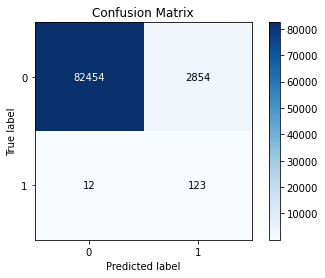

In [ ]:
y_pred_3 = log_reg_undersampled.predict(x_test)
print('FOR LOGISTIC REGRESSION UNDERSAMPLED OVER ORIGANAL TEST DATA:')
print("accuracy_score:{}\n".format(accuracy_score(y_test, y_pred_3)))
print("f1 score:{}\n".format(f1_score(y_test,y_pred_3)))
scores_1= cross_val_score(log_reg_undersampled, X_undersampled_train, Y_undersampled_train, cv=14)
print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(y_test,y_pred_3))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_3)

as we can see the model is performing pretty well for the original data as well

now we can use grid serach to find best parameters

---



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [1,2,3,4,5,6,7,8,9,10], 
              "penalty": ['l2']}
print(y_test)
print(y_pred_1)            
grid_search = GridSearchCV(log_reg1, param_grid, scoring="precision") #score
grid_search.fit(y_test.to_numpy().reshape(-1, 1), y_pred_3.reshape(-1, 1))

log_reg1 = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_

169876    0
127467    0
137900    0
21513     0
134700    0
         ..
128956    0
177494    0
26287     0
198160    0
25893     0
Name: Class, Length: 85443, dtype: int64
[0 0 0 ... 0 0 0]


({'C': 1, 'penalty': 'l2'}, 0.9126964295629962)

accuracy_score:0.9664571702772609

f1 score:0.07904884318766066

Cross-Validation Accuracy Scores:[0.88       0.9        0.95918367 0.93877551 0.97959184 0.91836735
 0.95918367 0.91836735 0.95918367 0.97959184 0.89795918 0.97959184
 0.91836735 0.97959184]

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



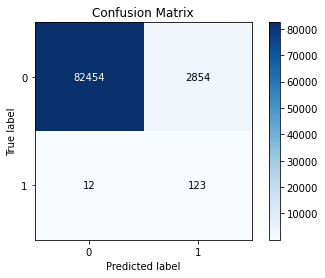

In [ ]:
log_reg_undersampled1 = LogisticRegression()
log_reg_undersampled1.fit(X_undersampled_train, Y_undersampled_train)
y_pred_4 = log_reg_undersampled1.predict(x_test)
print("accuracy_score:{}\n".format(accuracy_score(y_test, y_pred_4)))
print("f1 score:{}\n".format(f1_score(y_test,y_pred_4)))
scores_1= cross_val_score(log_reg_undersampled1, X_undersampled_train, Y_undersampled_train, cv=14)
print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(y_test,y_pred_4))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_4)

BELOW IS TH EMETHOD TO PRODUCE OVERSAMPLE DATA FOR BALANCING THE DATA:

In [ ]:
fraud_cases = df[df["Class"] == 1]
fraud_cases = pd.concat([fraud_cases] * int(len(df) / len(fraud_cases)), ignore_index=True)
noise = np.random.uniform(0.9, 1.1, fraud_cases.shape)
fraud_cases = fraud_cases.multiply(noise)
fraud_cases["Class"] = 1
df_extended = df.append(fraud_cases, ignore_index=True)
df_oversampled = df_extended.sample(frac=1, random_state=0).reset_index(drop=True)
X_oversampled = df_oversampled.drop(['Class','Time'], axis=1)
Y_oversampled = df_oversampled['Class']
X_oversampled_train, X_oversampled_test, Y_oversampled_train, Y_oversampled_test = train_test_split(X_oversampled, Y_oversampled, test_size = 0.30)

size of oversampled_data: 569183


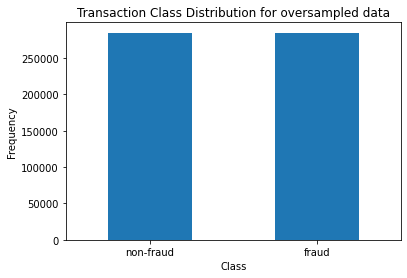

In [ ]:
count_classes = pd.value_counts(df_oversampled['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution for oversampled data")
plt.xticks(range(2), ['non-fraud','fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
print('size of oversampled_data:', len(df_oversampled))

FOR LOGISTIC REGRESSION OVERSAMPLED DATA:
accuracy_score:0.9466487072120875

f1 score:0.9450622346584331

Cross-Validation Accuracy Scores:[0.94666198 0.94943781 0.94539513 0.94620331 0.94820619 0.94511402
 0.94571137 0.94599248 0.9460979  0.94753856 0.94781967 0.94936575
 0.94760884 0.94441126]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85395
           1       0.97      0.92      0.95     85360

    accuracy                           0.95    170755
   macro avg       0.95      0.95      0.95    170755
weighted avg       0.95      0.95      0.95    170755



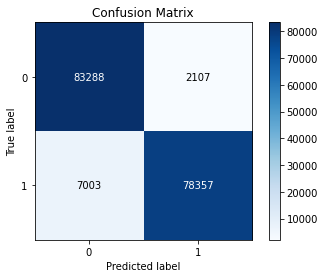

In [ ]:
log_reg_oversampled = LogisticRegression()
log_reg_oversampled.fit(X_oversampled_train, Y_oversampled_train)
y_pred_5 = log_reg_oversampled.predict(X_oversampled_test)
print('FOR LOGISTIC REGRESSION OVERSAMPLED DATA:')
print("accuracy_score:{}\n".format(accuracy_score(Y_oversampled_test, y_pred_5)))
print("f1 score:{}\n".format(f1_score(Y_oversampled_test, y_pred_5)))
scores_1= cross_val_score(log_reg_oversampled, X_oversampled_train, Y_oversampled_train, cv=14)
print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(Y_oversampled_test,y_pred_5))
skplt.metrics.plot_confusion_matrix(Y_oversampled_test,y_pred_5)

Area under the curve : 0.946643
Average precision-recall score RF: 0.9349338729953955


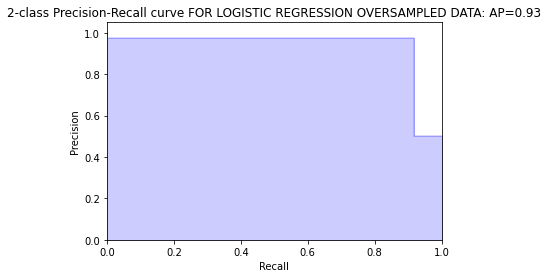

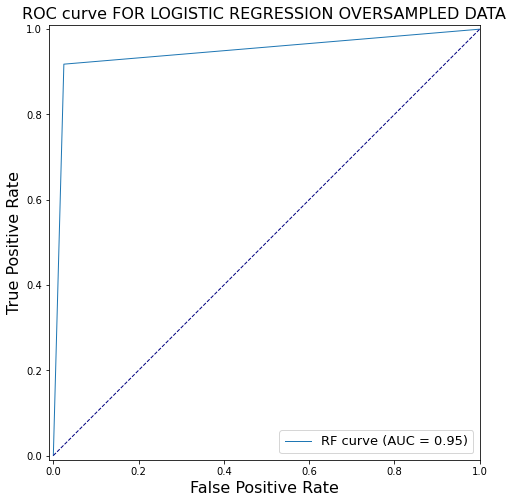

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_oversampled_test, y_pred_5)
print("Area under the curve : %f" % (roc_auc_score(Y_oversampled_test, y_pred_5)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_oversampled_test, y_pred_5)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR LOGISTIC REGRESSION OVERSAMPLED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_oversampled_test, y_pred_5)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR LOGISTIC REGRESSION OVERSAMPLED DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

LINEAR REGRESSION

FOR LINEAR REGRESSION ORIGINAL DATA:
accuracy_score:0.9988764439450862

f1 score:0.52

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.80      0.39      0.52       135

    accuracy                           1.00     85443
   macro avg       0.90      0.69      0.76     85443
weighted avg       1.00      1.00      1.00     85443



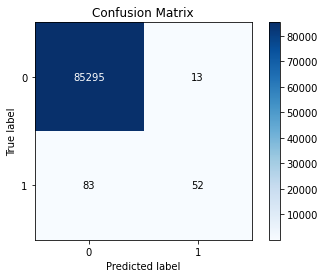

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(x_train, y_train)

y_pred_linreg_1 = lin_reg1.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
print('FOR LINEAR REGRESSION ORIGINAL DATA:')
y_pred_linreg_1=(y_pred_linreg_1>0.5)
print("accuracy_score:{}\n".format(accuracy_score(y_test, y_pred_linreg_1)))
print("f1 score:{}\n".format(f1_score(y_test, y_pred_linreg_1)))
# scores_1= cross_val_score(log_reg_oversampled, X_oversampled_train, Y_oversampled_train, cv=14)
# print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(y_test, y_pred_linreg_1))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_linreg_1)


Area under the curve : 0.692516
Average precision-recall score RF: 0.3091195559872924


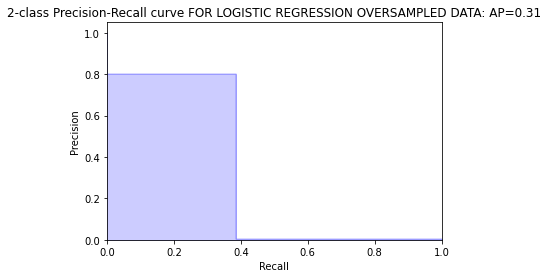

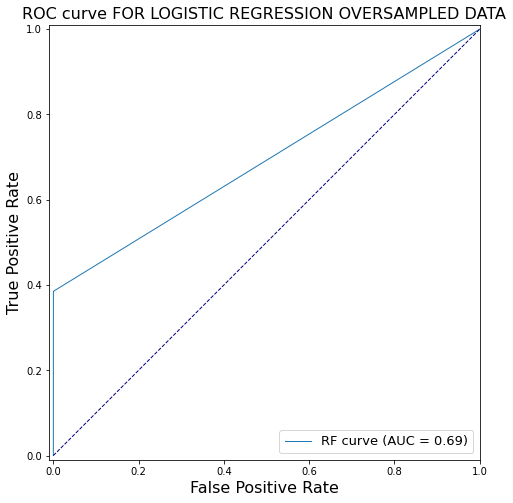

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(y_test, y_pred_linreg_1)
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred_linreg_1)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(y_test, y_pred_linreg_1)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR LOGISTIC REGRESSION OVERSAMPLED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_linreg_1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR LOGISTIC REGRESSION OVERSAMPLED DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

0.6561981533517375
FOR LINEAR REGRESSION UNDERSAMPELED DATA:
accuracy_score:0.8952702702702703

f1 score:0.8888888888888888

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       143
           1       0.98      0.81      0.89       153

    accuracy                           0.90       296
   macro avg       0.91      0.90      0.89       296
weighted avg       0.91      0.90      0.89       296



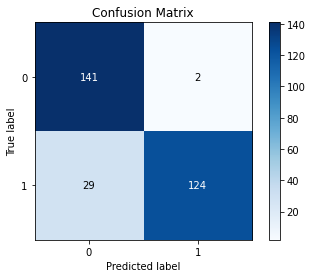

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_undersampled_train, Y_undersampled_train)
print(lin_reg2.score(X_undersampled_train, Y_undersampled_train))
y_pred_linreg_2 = lin_reg2.predict(X_undersampled_test)
from sklearn.metrics import mean_squared_error, r2_score
print('FOR LINEAR REGRESSION UNDERSAMPELED DATA:')

y_pred_linreg_2=(y_pred_linreg_2>0.5)
print("accuracy_score:{}\n".format(accuracy_score(Y_undersampled_test, y_pred_linreg_2)))
print("f1 score:{}\n".format(f1_score(Y_undersampled_test, y_pred_linreg_2)))
# scores_1= cross_val_score(log_reg_oversampled, X_oversampled_train, Y_oversampled_train, cv=14)
# print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(Y_undersampled_test, y_pred_linreg_2))
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, y_pred_linreg_2)


Area under the curve : 0.898236
Average precision-recall score RF: 0.8955660842915745


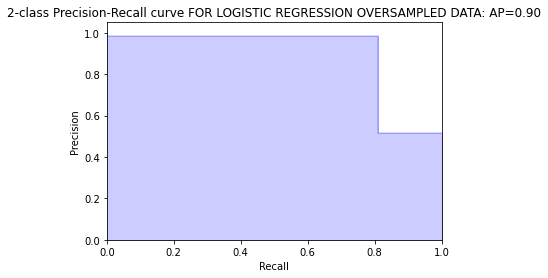

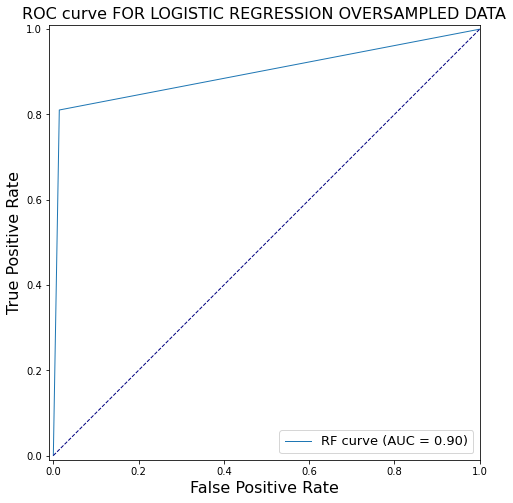

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_undersampled_test, y_pred_linreg_2)
print("Area under the curve : %f" % (roc_auc_score(Y_undersampled_test, y_pred_linreg_2)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_undersampled_test, y_pred_linreg_2)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR LOGISTIC REGRESSION OVERSAMPLED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_undersampled_test, y_pred_linreg_2)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR LOGISTIC REGRESSION OVERSAMPLED DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

0.6384055703839033
FOR LINEAR REGRESSION OVERSAMPELED DATA:
accuracy_score:0.9163655529852713

f1 score:0.9099995588522596

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85395
           1       0.98      0.85      0.91     85360

    accuracy                           0.92    170755
   macro avg       0.92      0.92      0.92    170755
weighted avg       0.92      0.92      0.92    170755



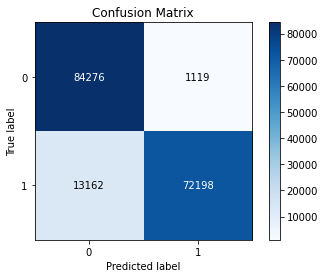

In [ ]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X_oversampled_train, Y_oversampled_train)
print(lin_reg3.score(X_oversampled_train, Y_oversampled_train))
y_pred_linreg_3 = lin_reg3.predict(X_oversampled_test)
from sklearn.metrics import mean_squared_error, r2_score
print('FOR LINEAR REGRESSION OVERSAMPELED DATA:')
y_pred_linreg_3=(y_pred_linreg_3>0.5)
print("accuracy_score:{}\n".format(accuracy_score(Y_oversampled_test, y_pred_linreg_3)))
print("f1 score:{}\n".format(f1_score(Y_oversampled_test, y_pred_linreg_3)))
# scores_1= cross_val_score(log_reg_oversampled, X_oversampled_train, Y_oversampled_train, cv=14)
# print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(Y_oversampled_test, y_pred_linreg_3))
skplt.metrics.plot_confusion_matrix(Y_oversampled_test, y_pred_linreg_3)


Area under the curve : 0.916351
Average precision-recall score RF: 0.9099780905067577


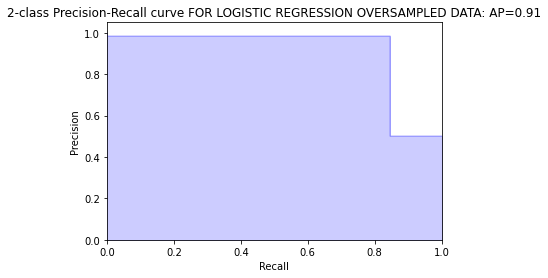

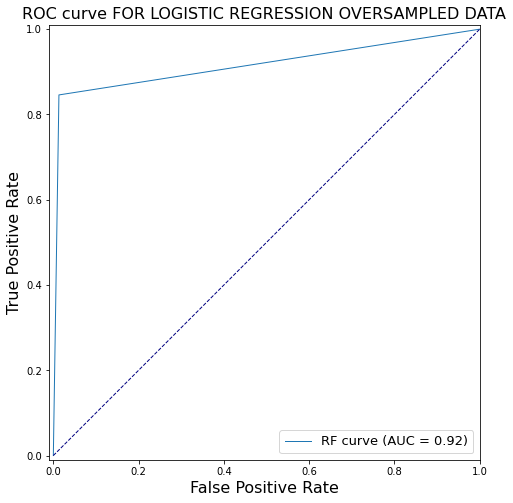

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_oversampled_test, y_pred_linreg_3)
print("Area under the curve : %f" % (roc_auc_score(Y_oversampled_test, y_pred_linreg_3)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_oversampled_test, y_pred_linreg_3)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR LOGISTIC REGRESSION OVERSAMPLED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_oversampled_test, y_pred_linreg_3)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR LOGISTIC REGRESSION OVERSAMPLED DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X_undersampled_train, Y_undersampled_train)
print(lin_reg3.score(X_undersampled_train, Y_undersampled_train))
y_pred_linreg_3 = lin_reg3.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
print('FOR LINEAR REGRESSION OVERSAMPELED DATA:')
print('Coefficients: \n', lin_reg3.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_linreg_3))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score( y_test, y_pred_linreg_3))

0.6561981533517375
Coefficients: 
 [-2.82520994e-02 -8.06840955e-03 -1.68440912e-02  7.26078945e-02
 -8.04962542e-03 -9.01312175e-03  5.63741800e-02 -2.56817149e-02
  1.91990086e-02 -2.06776396e-02  1.77072408e-02  1.52817265e-02
 -2.50131887e-02 -4.43442910e-02  1.11032516e-02  1.02496036e-02
 -1.58308319e-02  1.57515000e-02  8.22339162e-04  1.72690225e-04
  1.15994082e-02  2.42409251e-02 -4.41793077e-02  1.88604236e-02
 -2.01850691e-02 -7.80150654e-02 -1.68588042e-02  1.34441011e-01
 -4.90602267e-05]
Mean squared error: 0.06
Coefficient of determination: -34.41


ANN-----NEURAL NETWORKS

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
ann_1 = Sequential()
ann_1.add(Dense(64, activation="relu", input_dim=(x_train.shape[1])))
ann_1.add(Dense(32, activation="relu"))
ann_1.add(Dense(16, activation="relu"))
ann_1.add(Dense(8, activation="relu"))
ann_1.add(Dense(4, activation="relu"))
ann_1.add(Dense(2, activation="relu"))
ann_1.add(Dense(1, activation="sigmoid"))
ann_1.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
ann_1.summary()
history_ann_1 = ann_1.fit(x_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(x_test, y_test), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1920      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

2671/2671 [==============================] - 2s 894us/step - loss: 0.0033 - accuracy: 0.9994
FOR ANN ON ORIGINAL DATA:
[0.0032999340910464525, 0.9993914365768433]
accuracy_score:0.9993914071369217

f1 score:0.795275590551181

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.85      0.75      0.80       135

    accuracy                           1.00     85443
   macro avg       0.92      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



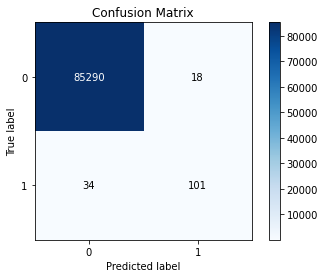

In [ ]:
ann_1_results = ann_1.evaluate(x_test, y_test)
print('FOR ANN ON ORIGINAL DATA:')
print(ann_1_results)

y_pred_ann_1 = ann_1.predict_classes(x_test)
print("accuracy_score:{}\n".format(accuracy_score(y_test, y_pred_ann_1)))
print("f1 score:{}\n".format(f1_score(y_test, y_pred_ann_1)))
#scores_1= cross_val_score(ann_1, x_train, y_train, cv=14)
#print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(y_test,y_pred_ann_1))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_ann_1)


Area under the curve : 0.873969
Average precision-recall score RF: 0.6353808081444875


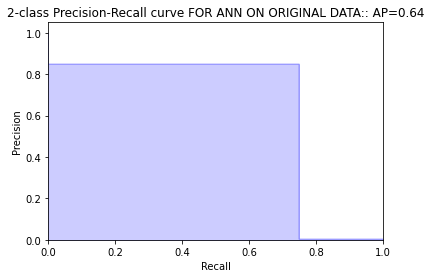

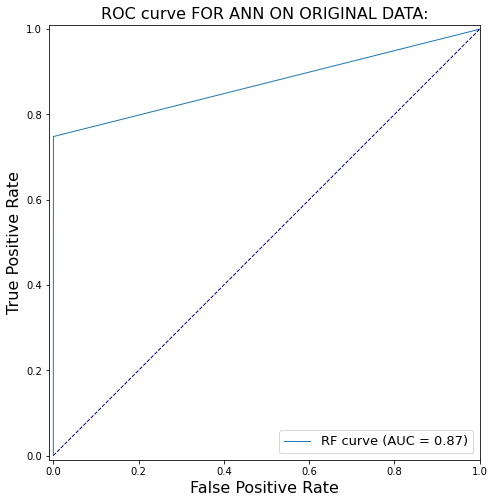

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(y_test,y_pred_ann_1)
print("Area under the curve : %f" % (roc_auc_score(y_test,y_pred_ann_1)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(y_test,y_pred_ann_1)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR ANN ON ORIGINAL DATA:: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test,y_pred_ann_1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR ANN ON ORIGINAL DATA:', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
ann_undersampled = Sequential()
ann_undersampled.add(Dense(64, activation="relu", input_dim=(X_undersampled_train.shape[1])))
ann_undersampled.add(Dense(32, activation="relu"))
ann_undersampled.add(Dense(16, activation="relu"))
ann_undersampled.add(Dense(8, activation="relu"))
ann_undersampled.add(Dense(4, activation="relu"))
ann_undersampled.add(Dense(2, activation="relu"))
ann_undersampled.add(Dense(1, activation="sigmoid"))
ann_undersampled.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
ann_undersampled.summary()
history_ann_undersampled = ann_undersampled.fit(X_undersampled_train, 
                    Y_undersampled_train, 
                    epochs=50, 
                    validation_data=(X_undersampled_test, Y_undersampled_test), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

10/10 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.9257
FOR ANN ON UNDERSAMPLEDED DATA:
[0.338524729013443, 0.9256756901741028]
accuracy_score:0.9256756756756757

f1 score:0.9266666666666667

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       143
           1       0.95      0.91      0.93       153

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



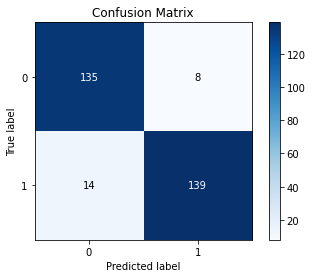

In [ ]:
ann_undersampled_results = ann_undersampled.evaluate(X_undersampled_test, Y_undersampled_test)
print('FOR ANN ON UNDERSAMPLEDED DATA:')
print(ann_undersampled_results)

y_pred_ann_undersampled = ann_undersampled.predict_classes(X_undersampled_test)
print("accuracy_score:{}\n".format(accuracy_score(Y_undersampled_test, y_pred_ann_undersampled)))
print("f1 score:{}\n".format(f1_score(Y_undersampled_test, y_pred_ann_undersampled)))
#scores_1= cross_val_score(ann_undersampled, x_train, y_train, cv=14)
#print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(Y_undersampled_test,y_pred_ann_undersampled))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_undersampled_test,y_pred_ann_undersampled)


Area under the curve : 0.926276
Average precision-recall score RF: 0.9063520303016102


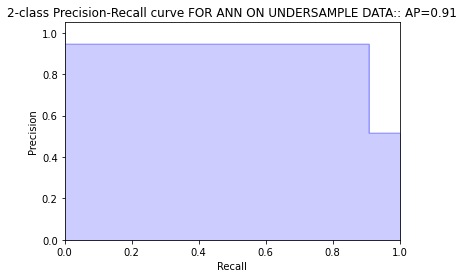

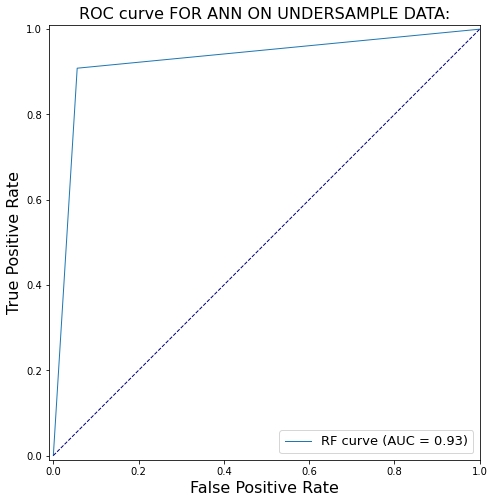

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_undersampled_test,y_pred_ann_undersampled)
print("Area under the curve : %f" % (roc_auc_score(Y_undersampled_test,y_pred_ann_undersampled)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_undersampled_test,y_pred_ann_undersampled)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR ANN ON UNDERSAMPLE DATA:: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_undersampled_test,y_pred_ann_undersampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR ANN ON UNDERSAMPLE DATA:', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
fraud_cases = df[df["Class"] == 1]
fraud_cases = pd.concat([fraud_cases] * int(len(df) / len(fraud_cases)), ignore_index=True)
noise = np.random.uniform(0.9, 1.1, fraud_cases.shape)
fraud_cases = fraud_cases.multiply(noise)
fraud_cases["Class"] = 1
df_extended = df.append(fraud_cases, ignore_index=True)
df_oversampled = df_extended.sample(frac=1, random_state=0).reset_index(drop=True)
X_oversampled = df_oversampled.drop(['Class','Time'], axis=1)
Y_oversampled = df_oversampled['Class']
X_oversampled_train, X_oversampled_test, Y_oversampled_train, Y_oversampled_test = train_test_split(X_oversampled, Y_oversampled, test_size = 0.30)

In [ ]:
X_oversampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.914944,1.244867,-4.647431,1.951271,-1.096254,-2.510108,-2.321576,0.281939,-0.901180,-4.886940,2.346688,-5.172791,-1.101955,-6.008834,1.049459,-2.930282,-4.764456,-1.935296,0.484853,0.456522,0.325919,-0.841758,0.094882,-0.277917,0.026102,-0.097367,0.614941,0.295339,70.798710
1,-4.704095,5.592795,-8.916724,7.965395,-3.265854,-1.868794,-7.570269,3.191168,-3.584386,-7.057074,6.826809,-11.280190,2.932100,-10.974710,-0.246146,-5.474034,-9.009116,-2.211758,1.497095,0.104885,1.072228,0.225578,0.278138,-0.508641,-0.186064,0.388813,-0.369572,-0.828062,0.000000
2,1.245988,3.113510,-4.614595,4.361996,3.716145,-1.338133,1.616445,-0.474780,-1.195802,-2.552059,2.040838,-4.310146,1.482178,-5.678420,-0.371686,2.612531,6.302054,2.762205,-2.881460,0.008156,-0.373752,-0.765290,-0.719383,-1.496365,1.511218,0.518418,-0.010055,0.158848,1.061123
3,-0.414212,5.078611,-7.695984,7.553472,0.248503,-2.387875,-3.037262,0.934102,-4.635788,-5.914932,4.315167,-8.029327,-0.224681,-12.237949,0.996215,-3.156265,-2.870265,-0.162050,0.841165,0.819586,0.599783,-0.450946,-0.098558,-0.693006,-0.310047,0.498358,0.774222,0.375308,0.806568
4,-2.246387,5.448018,-11.126565,8.528803,-1.799609,-2.784160,-7.321728,1.966837,-5.938642,-13.103530,11.495412,-18.512027,-0.400248,-19.057207,-0.874710,-9.245209,-15.008795,-6.017373,-0.413036,1.508905,1.610700,-0.272288,-0.697184,-1.102835,1.763416,0.755726,2.133252,1.193815,1.041810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569178,-0.285556,3.393972,-3.473525,4.236514,3.278012,-2.025010,0.262130,-3.025352,-3.009269,-2.550486,1.790360,-2.598017,-2.451373,-6.587235,0.120027,2.320108,6.924333,2.562163,-3.829799,0.447050,-1.452390,-0.154572,-1.348563,-0.242021,1.187931,0.459479,0.130917,0.452748,1.078894
569179,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.310000
569180,-0.589400,0.747828,1.784781,0.899612,0.257067,-0.001301,0.122334,0.034736,-0.283998,-0.115388,-1.160265,-0.269893,0.524804,-0.043216,1.682857,0.227203,-0.558256,0.578032,0.976897,0.047357,-0.008910,0.000367,-0.238139,-0.463529,-0.243573,-0.370920,0.086592,0.118084,15.990000
569181,-5.612535,-7.875981,-5.712678,5.296664,4.567777,-5.124585,-4.164301,0.886225,-0.973892,-3.008784,1.111233,-2.011307,1.047237,-4.902821,-0.134756,-2.909781,-2.961651,-0.909016,0.414188,3.375467,1.457415,-0.122677,0.779071,-0.280190,-1.157281,-0.653897,0.588392,-1.021834,273.653017


In [ ]:
Y_oversampled

0         1
1         1
2         1
3         1
4         1
         ..
569178    1
569179    0
569180    0
569181    1
569182    1
Name: Class, Length: 569183, dtype: int64

In [ ]:
ann_oversampled = Sequential()
ann_oversampled.add(Dense(64, activation="relu", input_dim=(X_oversampled_train.shape[1])))
ann_oversampled.add(Dense(32, activation="relu"))
ann_oversampled.add(Dense(16, activation="relu"))
ann_oversampled.add(Dense(8, activation="relu"))
ann_oversampled.add(Dense(4, activation="relu"))
ann_oversampled.add(Dense(2, activation="relu"))
ann_oversampled.add(Dense(1, activation="sigmoid"))
ann_oversampled.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
ann_oversampled.summary()
history_ann_oversampled = ann_oversampled.fit(X_oversampled_train, 
                    Y_oversampled_train, 
                    epochs=50, 
                    validation_data=(X_oversampled_test, Y_oversampled_test), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

5337/5337 [==============================] - 5s 943us/step - loss: 0.0799 - accuracy: 0.9818
FOR ANN ON OVERSAMPLEDED DATA:
[0.07986383140087128, 0.9817574620246887]
accuracy_score:0.9817574887997423

f1 score:0.9814507148769436

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     85395
           1       1.00      0.97      0.98     85360

    accuracy                           0.98    170755
   macro avg       0.98      0.98      0.98    170755
weighted avg       0.98      0.98      0.98    170755



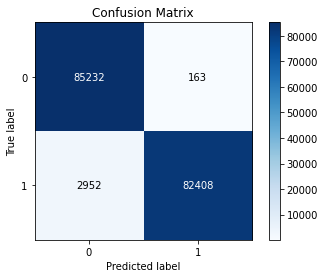

In [ ]:
ann_oversampled_results = ann_oversampled.evaluate(X_oversampled_test, Y_oversampled_test)
print('FOR ANN ON OVERSAMPLEDED DATA:')
print(ann_oversampled_results)

y_pred_ann_oversampled = ann_oversampled.predict_classes(X_oversampled_test)
print("accuracy_score:{}\n".format(accuracy_score(Y_oversampled_test, y_pred_ann_oversampled)))
print("f1 score:{}\n".format(f1_score(Y_oversampled_test, y_pred_ann_oversampled)))
#scores_1= cross_val_score(ann_oversampled, x_train, y_train, cv=14)
#print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(Y_oversampled_test,y_pred_ann_oversampled))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_oversampled_test,y_pred_ann_oversampled)


Area under the curve : 0.981754
Average precision-recall score RF: 0.9807991943866121


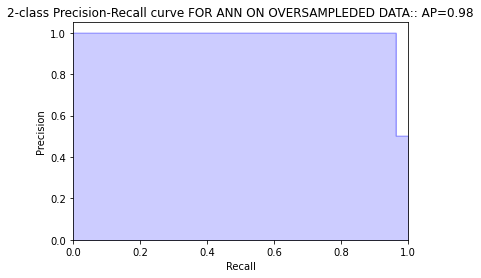

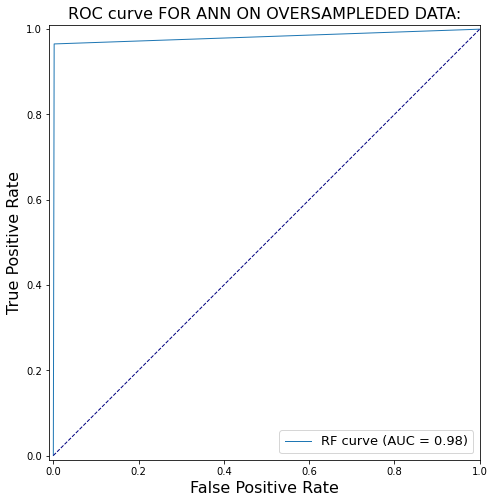

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_oversampled_test, y_pred_ann_oversampled)
print("Area under the curve : %f" % (roc_auc_score(Y_oversampled_test, y_pred_ann_oversampled)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_oversampled_test, y_pred_ann_oversampled)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR ANN ON OVERSAMPLEDED DATA:: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_oversampled_test, y_pred_ann_oversampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR ANN ON OVERSAMPLEDED DATA:', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

prediction on orignal test dataset

2671/2671 [==============================] - 3s 960us/step - loss: 0.0398 - accuracy: 0.9983
[0.0397702157497406, 0.9982678294181824]
accuracy_score:0.9982678510820079

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.48      0.95      0.63       135

    accuracy                           1.00     85443
   macro avg       0.74      0.97      0.82     85443
weighted avg       1.00      1.00      1.00     85443



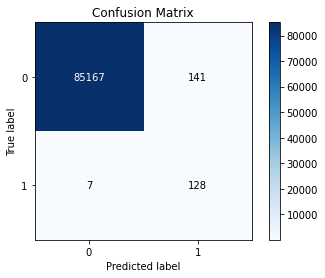

In [ ]:
ann_oversampled_results_2 = ann_oversampled.evaluate(x_test, y_test)
print(ann_oversampled_results_2)

y_pred_ann_oversampled_2 = ann_oversampled.predict_classes(x_test)
print("accuracy_score:{}\n".format(accuracy_score(y_test, y_pred_ann_oversampled_2)))
#print("f1 score:{}\n".format(f1_score(y_test,y_pred_1)))
#scores_1= cross_val_score(ann_oversampled, x_train, y_train, cv=14)
#print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(y_test,y_pred_ann_oversampled_2))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_ann_oversampled_2)


SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

standard_scaler.fit(x_train)
x_train = standard_scaler.transform(x_train)
x_test = standard_scaler.transform(x_test)

 training score :0.999388 , Test Score: 0.999345 

f1 score:0.7829457364341086

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.82      0.75      0.78       135

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443





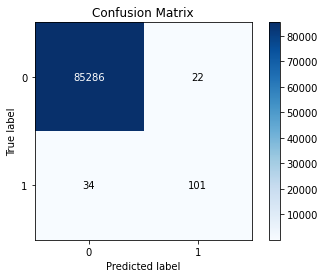

In [ ]:
from sklearn.svm import SVC
SVM_1 = SVC(C= 1, kernel= 'linear', random_state= 0).fit(x_train,y_train)
scoretrain_1 = SVM_1.score(x_train,y_train)
scoretest_1= SVM_1.score(x_test,y_test)
print(" training score :{:2f} , Test Score: {:2f} \n".format(scoretrain_1,scoretest_1))
y_pred_SVM_1= SVM_1.predict(x_test)
print("f1 score:{}\n".format(f1_score(y_test,y_pred_SVM_1)))
print(classification_report(y_test,y_pred_SVM_1))
#scores = cross_val_score(SVM_1, x_train, y_train, cv=14)
#print('Cross-Validation Accuracy Scores\n', scores)
print("\n")
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_SVM_1)


Area under the curve : 0.873945
Average precision-recall score RF: 0.6147309583219931


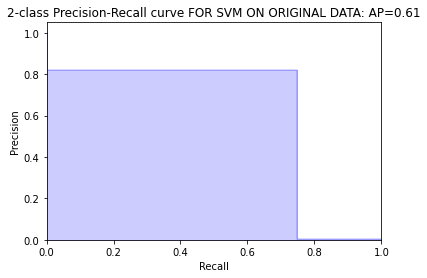

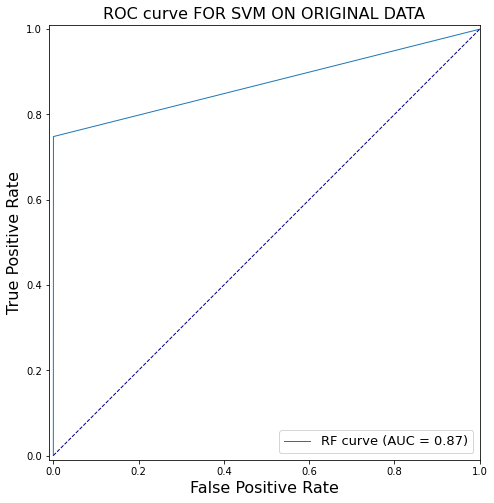

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(y_test,y_pred_SVM_1)
print("Area under the curve : %f" % (roc_auc_score(y_test,y_pred_SVM_1)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(y_test,y_pred_SVM_1)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR SVM ON ORIGINAL DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test,y_pred_SVM_1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR SVM ON ORIGINAL DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

standard_scaler.fit(X_undersampled_train)
X_undersampled_train = standard_scaler.transform(X_undersampled_train)
X_undersampled_test = standard_scaler.transform(X_undersampled_test)

FOR SVM ON OVERSAMPLE DATA:
 training score :0.952035 , Test Score: 0.939189 

f1 score:0.9387755102040817

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       143
           1       0.98      0.90      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296





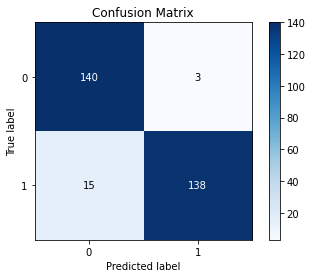

In [ ]:
from sklearn.svm import SVC
SVM_2 = SVC(C= 1, kernel= 'linear', random_state= 0).fit(X_undersampled_train,Y_undersampled_train)
scoretrain_1 = SVM_2.score(X_undersampled_train,Y_undersampled_train)
scoretest_1= SVM_2.score(X_undersampled_test,Y_undersampled_test)
print('FOR SVM ON UNDERSAMPLE DATA:')
print(" training score :{:2f} , Test Score: {:2f} \n".format(scoretrain_1,scoretest_1))
y_pred_SVM_2= SVM_2.predict(X_undersampled_test)
print("f1 score:{}\n".format(f1_score(Y_undersampled_test,y_pred_SVM_2)))
print(classification_report(Y_undersampled_test,y_pred_SVM_2))
# scores = cross_val_score(SVM_2, X_undersampled_train, Y_undersampled_train, cv=14)
# print('Cross-Validation Accuracy Scores\n', scores)
print("\n")
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_undersampled_test,y_pred_SVM_2)

Area under the curve : 0.940491
Average precision-recall score RF: 0.9334458050040028


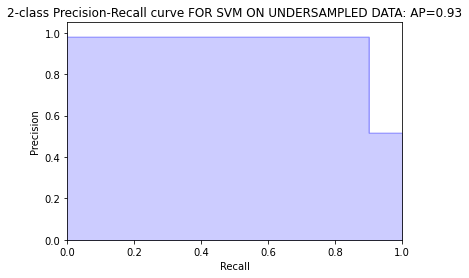

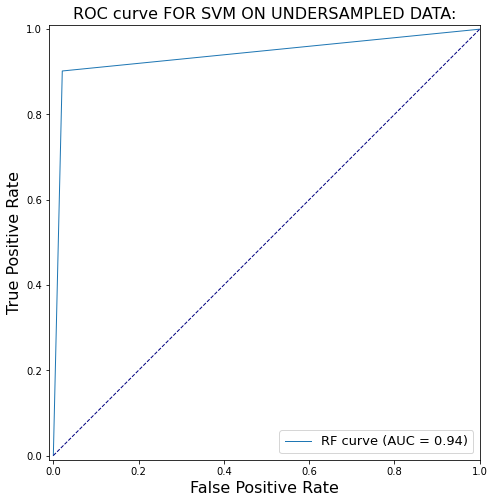

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_undersampled_test,y_pred_SVM_2)
print("Area under the curve : %f" % (roc_auc_score(Y_undersampled_test,y_pred_SVM_2)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_undersampled_test,y_pred_SVM_2)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR SVM ON UNDERSAMPLED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_undersampled_test,y_pred_SVM_2)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR SVM ON UNDERSAMPLED DATA:', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

standard_scaler.fit(X_oversampled_train)
X_oversampled_train = standard_scaler.transform(X_oversampled_train)
X_oversampled_test = standard_scaler.transform(X_oversampled_test)

FOR SVM ON OVERSAMPLE DATA:
 training score :0.948959 , Test Score: 0.948798 

f1 score:0.9471763547274231





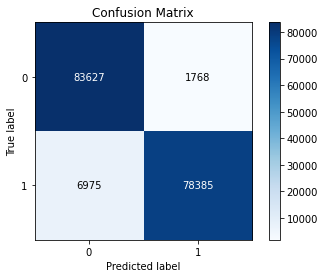

In [ ]:
from sklearn.svm import SVC
SVM_3 = SVC(C= 1, kernel= 'linear', random_state= 0).fit(X_oversampled_train,Y_oversampled_train)
scoretrain_1 = SVM_3.score(X_oversampled_train,Y_oversampled_train)
scoretest_1= SVM_3.score(X_oversampled_test,Y_oversampled_test)
print('FOR SVM ON OVERSAMPLE DATA:')
print(" training score :{:2f} , Test Score: {:2f} \n".format(scoretrain_1,scoretest_1))
y_pred_SVM_3= SVM_3.predict(X_oversampled_test)
print("f1 score:{}\n".format(f1_score(Y_oversampled_test,y_pred_SVM_3)))
# print(classification_report(Y_oversampled_test,y_pred_SVM_3))
# scores = cross_val_score(SVM_3, X_oversampled_train, Y_oversampled_train, cv=14)
#print('Cross-Validation Accuracy Scores\n', scores)
print("\n")
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_oversampled_test,y_pred_SVM_3)

Area under the curve : 0.948792
Average precision-recall score RF: 0.9388798427359029


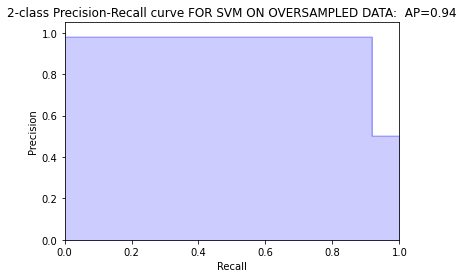

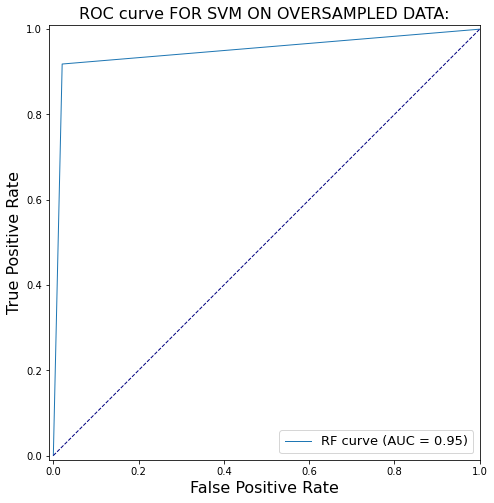

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_oversampled_test,y_pred_SVM_3)
print("Area under the curve : %f" % (roc_auc_score(Y_oversampled_test,y_pred_SVM_3)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_oversampled_test,y_pred_SVM_3)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR SVM ON OVERSAMPLED DATA:  AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_oversampled_test,y_pred_SVM_3)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR SVM ON OVERSAMPLED DATA:', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

below is for evaluation of performance

In [ ]:
# from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # Create true and false positive rates
# false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# # Calculate Area Under the Receiver Operating Characteristic Curve 
# probs = model.predict_proba(X_test)
# roc_auc = roc_auc_score(y_test, probs[:, 1])
# print('ROC AUC Score:',roc_auc)

# # Obtain precision and recall 
# precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# # Calculate average precision 
# average_precision = average_precision_score(y_test, y_predicted)

# # Define a roc_curve function
# def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
#     plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
#     plt.plot([0,1],[0,1], linewidth=5)
#     plt.xlim([-0.01, 1])
#     plt.ylim([0, 1.01])
#     plt.legend(loc='upper right')
#     plt.title('Receiver operating characteristic curve (ROC)')
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()

# # Define a precision_recall_curve function
# def plot_pr_curve(recall, precision, average_precision):
#     plt.step(recall, precision, color='b', alpha=0.2, where='post')
#     plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
#     plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
#     plt.show()

# # Print the classifcation report and confusion matrix
# print('Classification report:\n', classification_report(y_test, y_predicted))
# print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# # Plot the roc curve 
# plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# # Plot recall precision curve
# plot_pr_curve(recall, precision, average_precision)

DECISION TREE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score

FOR DECISION TREE CLASSIFIER ON ORIGINAL DATA:
accuracy_score:0.9991222218320986

f1 score:0.7292418772563176

Cross-Validation Accuracy Scores:[0.99880626 0.99901692 0.99908714 0.99922758 0.99964888 0.99880618
 0.99936798 0.9991573  0.99922753 0.99922753 0.99929775 0.9988764
 0.99929775 0.99901685]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.75      0.73       135

    accuracy                           1.00     85443
   macro avg       0.86      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443



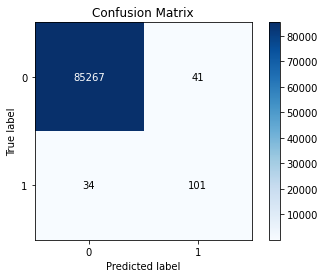

In [ ]:
DTC_1 = DecisionTreeClassifier()
DTC_1.fit(x_train, y_train)
y_pred_DTC_1 = DTC_1.predict(x_test)
print('FOR DECISION TREE CLASSIFIER ON ORIGINAL DATA:')
print("accuracy_score:{}\n".format(accuracy_score(y_test, y_pred_DTC_1)))
print("f1 score:{}\n".format(f1_score(y_test, y_pred_DTC_1)))
scores_1= cross_val_score(DTC_1, x_train, y_train, cv=14)
print("Cross-Validation Accuracy Scores:{}\n".format(scores_1))
print(classification_report(y_test,y_pred_DTC_1))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_DTC_1)
# Calculate average precision 
average_precision_DTC_1 = average_precision_score(y_test, y_pred_DTC_1)

# Obtain precision and recall 
precision_DTC_1, recall_DTC_1, _ = precision_recall_curve(y_test, y_pred_DTC_1)

# Plot the recall precision tradeoff
#plot_pr_curve(recall_DTC_1, precision_DTC_1, average_precision_DTC_1)

Area under the curve : 0.873834
Average precision-recall score RF: 0.5325314680954789


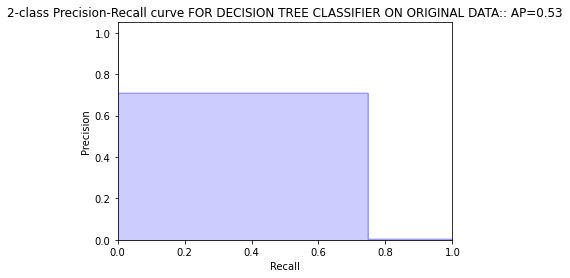

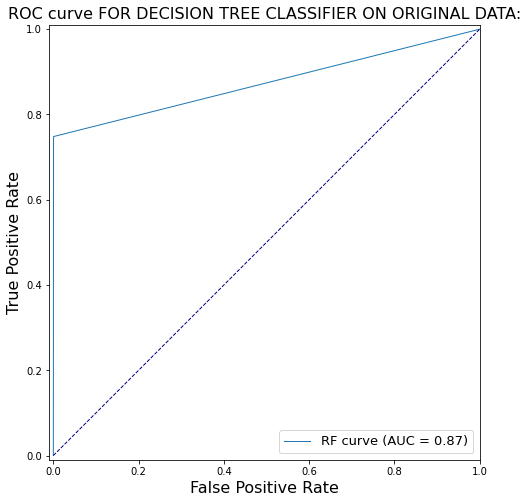

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(y_test, y_pred_DTC_1)
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred_DTC_1)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(y_test, y_pred_DTC_1)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR DECISION TREE CLASSIFIER ON ORIGINAL DATA:: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_DTC_1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR DECISION TREE CLASSIFIER ON ORIGINAL DATA:', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

FOR DECISION TREE CLASSIFIER ON UNDERSAMPLED DATA:
accuracy_score:0.902027027027027

f1 score:0.9085173501577287

Cross-Validation Accuracy Scores:[0.88       0.9        0.91836735 0.85714286 0.91836735 0.85714286
 0.89795918 0.85714286 0.95918367 0.95918367 0.87755102 0.95918367
 0.89795918 0.85714286]

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       143
           1       0.88      0.94      0.91       153

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



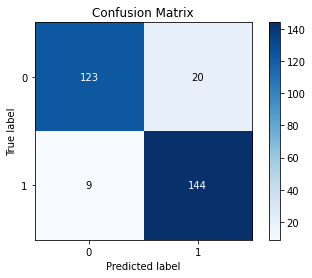

In [ ]:
DTC_undersampled = DecisionTreeClassifier()
DTC_undersampled.fit(X_undersampled_train, Y_undersampled_train)
y_pred_DTC_undersampled = DTC_undersampled.predict(X_undersampled_test)
print('FOR DECISION TREE CLASSIFIER ON UNDERSAMPLED DATA:')
print("accuracy_score:{}\n".format(accuracy_score(Y_undersampled_test, y_pred_DTC_undersampled)))
print("f1 score:{}\n".format(f1_score(Y_undersampled_test, y_pred_DTC_undersampled)))
scores_undersampled= cross_val_score(DTC_undersampled, X_undersampled_train, Y_undersampled_train, cv=14)
print("Cross-Validation Accuracy Scores:{}\n".format(scores_undersampled))
print(classification_report(Y_undersampled_test,y_pred_DTC_undersampled))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_undersampled_test,y_pred_DTC_undersampled)
# Calculate average precision 
average_precision_DTC_undersampled = average_precision_score(Y_undersampled_test, y_pred_DTC_undersampled)

# Obtain precision and recall 
precision_DTC_undersampled, recall_DTC_undersampled, _ = precision_recall_curve(Y_undersampled_test, y_pred_DTC_undersampled)

# Plot the recall precision tradeoff
#plot_pr_curve(recall_DTC_undersampled, precision_DTC_undersampled, average_precision_DTC_undersampled)

Area under the curve : 0.900658
Average precision-recall score RF: 0.8568042576292217


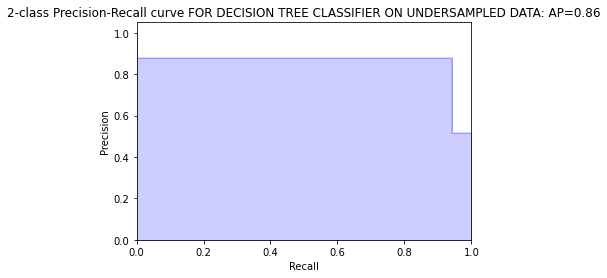

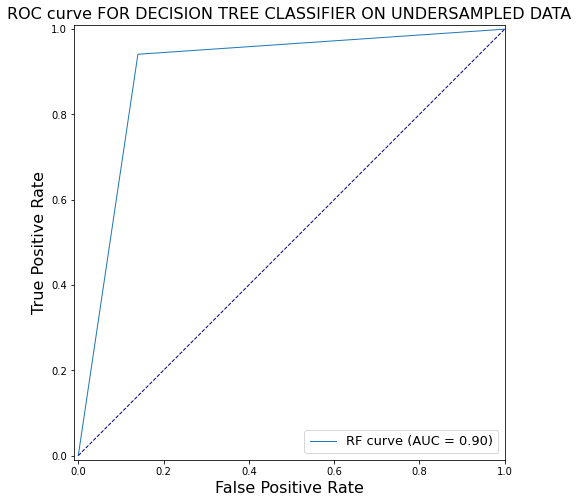

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_undersampled_test, y_pred_DTC_undersampled)
print("Area under the curve : %f" % (roc_auc_score(Y_undersampled_test, y_pred_DTC_undersampled)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_undersampled_test, y_pred_DTC_undersampled)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR DECISION TREE CLASSIFIER ON UNDERSAMPLED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_undersampled_test, y_pred_DTC_undersampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR DECISION TREE CLASSIFIER ON UNDERSAMPLED DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

FOR DECISION TREE CLASSIFIER ON OVERSAMPLED DATA:
accuracy_score:0.9994260782993177

f1 score:0.9994261018259332

Cross-Validation Accuracy Scores:[0.99950808 0.99954322 0.99936751 0.9995432  0.99957834 0.99957834
 0.99936751 0.99936751 0.99950806 0.99964862 0.99957834 0.9992621
 0.99929723 0.99936751]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85395
           1       1.00      1.00      1.00     85360

    accuracy                           1.00    170755
   macro avg       1.00      1.00      1.00    170755
weighted avg       1.00      1.00      1.00    170755



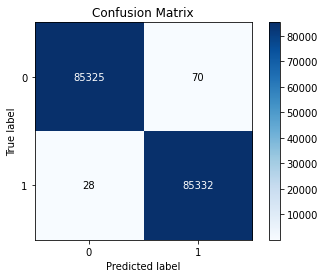

In [ ]:
DTC_oversampled = DecisionTreeClassifier()
DTC_oversampled.fit(X_oversampled_train, Y_oversampled_train)
y_pred_DTC_oversampled = DTC_oversampled.predict(X_oversampled_test)
print('FOR DECISION TREE CLASSIFIER ON OVERSAMPLED DATA:')

print("accuracy_score:{}\n".format(accuracy_score(Y_oversampled_test, y_pred_DTC_oversampled)))
print("f1 score:{}\n".format(f1_score(Y_oversampled_test, y_pred_DTC_oversampled)))
scores_oversampled= cross_val_score(DTC_oversampled, X_oversampled_train, Y_oversampled_train, cv=14)
print("Cross-Validation Accuracy Scores:{}\n".format(scores_oversampled))
print(classification_report(Y_oversampled_test,y_pred_DTC_oversampled))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_oversampled_test,y_pred_DTC_oversampled)
# Calculate average precision 
average_precision_DTC_oversampled = average_precision_score(Y_oversampled_test, y_pred_DTC_oversampled)

# Obtain precision and recall 
precision_DTC_oversampled, recall_DTC_oversampled, _ = precision_recall_curve(Y_oversampled_test, y_pred_DTC_oversampled)

# Plot the recall precision tradeoff
#plot_pr_curve(recall_DTC_oversampled, precision_DTC_oversampled, average_precision_DTC_oversampled)

Area under the curve : 0.999426
Average precision-recall score RF: 0.9990165710648662


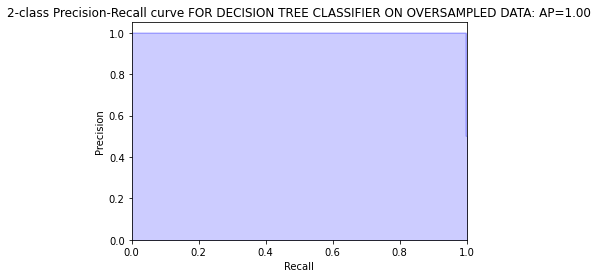

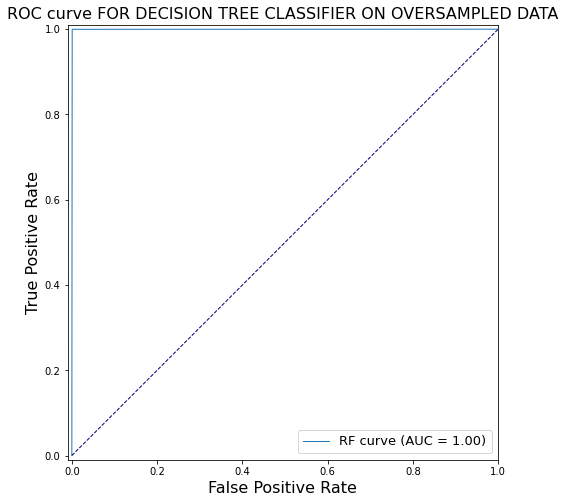

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_oversampled_test, y_pred_DTC_oversampled)
print("Area under the curve : %f" % (roc_auc_score(Y_oversampled_test, y_pred_DTC_oversampled)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_oversampled_test, y_pred_DTC_oversampled)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR DECISION TREE CLASSIFIER ON OVERSAMPLED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_oversampled_test, y_pred_DTC_oversampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR DECISION TREE CLASSIFIER ON OVERSAMPLED DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

unsupervised method

accuracy_score:0.9976510408803154

f1 score:0.3208121827411168

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.32      0.32      0.32       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807



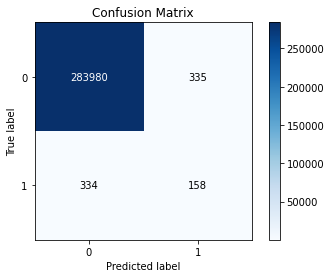

In [ ]:
from sklearn.ensemble import IsolationForest
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
iso_forest = IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,random_state=np.random.RandomState(42), verbose=0)
iso_forest.fit(X)
print('FOR UNSUPERVISED METHOD ON ORIGINAL DATA:')
scores_prediction = iso_forest.decision_function(X)
y_pred_iso_forest = iso_forest.predict(X)
y_pred_iso_forest[y_pred_iso_forest == 1] = 0
y_pred_iso_forest[y_pred_iso_forest == -1] = 1
print("accuracy_score:{}\n".format(accuracy_score(Y, y_pred_iso_forest)))
print("f1 score:{}\n".format(f1_score(Y,y_pred_iso_forest)))
# scores_iso= cross_val_score(iso_forest, X, Y, cv=14)
# print("Cross-Validation Accuracy Scores:{}\n".format(scores_iso))
print(classification_report(Y,y_pred_iso_forest))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y,y_pred_iso_forest)

Area under the curve : 0.661782
Average precision-recall score RF: 0.11825796998390657


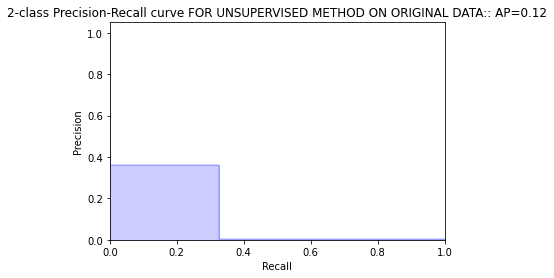

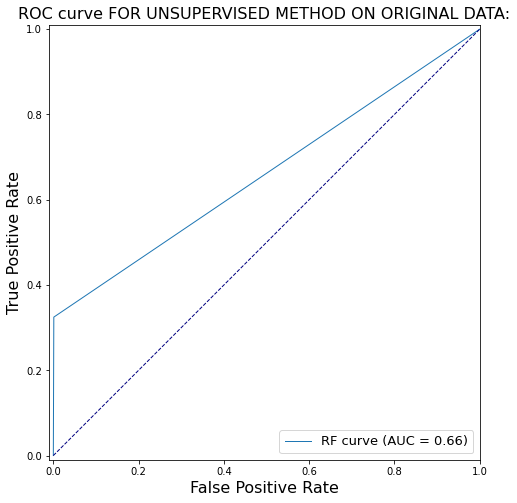

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y, y_pred_iso_forest)
print("Area under the curve : %f" % (roc_auc_score(Y, y_pred_iso_forest)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y, y_pred_iso_forest)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR UNSUPERVISED METHOD ON ORIGINAL DATA:: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y, y_pred_iso_forest)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR UNSUPERVISED METHOD ON ORIGINAL DATA:', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

FOR UNSUPERVISED METHOD UNDERSAMPLELED DATA:
accuracy_score:0.6595528455284553

f1 score:0.48540706605222744

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       492
           1       0.99      0.32      0.49       492

    accuracy                           0.66       984
   macro avg       0.79      0.66      0.62       984
weighted avg       0.79      0.66      0.62       984



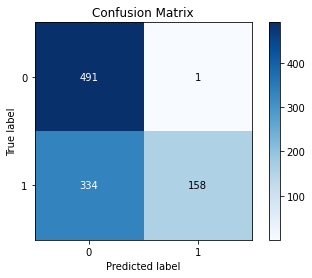

In [ ]:
from sklearn.ensemble import IsolationForest
Fraud = df_undersampled[df_undersampled['Class']==1]
Valid = df_undersampled[df_undersampled['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
iso_forest_undersampled = IsolationForest(n_estimators=100, max_samples=len(X_undersampled), contamination=outlier_fraction,random_state=np.random.RandomState(42), verbose=0)
iso_forest_undersampled.fit(X_undersampled)
scores_prediction_undersampled = iso_forest.decision_function(X_undersampled)
y_pred_iso_forest_undersampled = iso_forest.predict(X_undersampled)
y_pred_iso_forest_undersampled[y_pred_iso_forest_undersampled == 1] = 0
y_pred_iso_forest_undersampled[y_pred_iso_forest_undersampled == -1] = 1
print('FOR UNSUPERVISED METHOD UNDERSAMPLELED DATA:')
print("accuracy_score:{}\n".format(accuracy_score(Y_undersampled, y_pred_iso_forest_undersampled)))
print("f1 score:{}\n".format(f1_score(Y_undersampled,y_pred_iso_forest_undersampled)))
# scores_iso= cross_val_score(iso_forest, X, Y, cv=14)
# print("Cross-Validation Accuracy Scores:{}\n".format(scores_iso))
print(classification_report(Y_undersampled,y_pred_iso_forest_undersampled))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_undersampled,y_pred_iso_forest_undersampled)

Area under the curve : 0.659553
Average precision-recall score RF: 0.6585493685125531


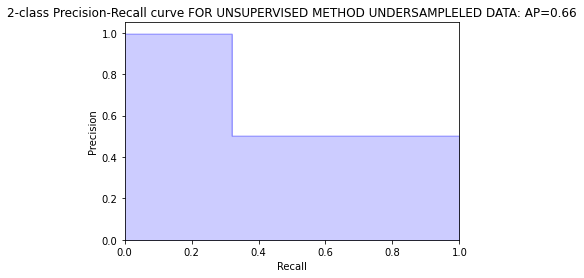

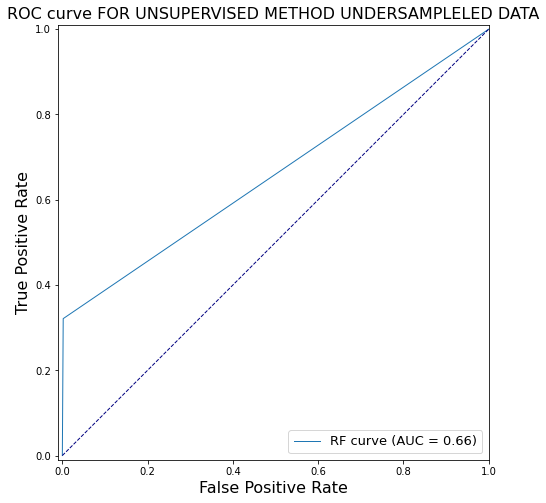

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y_undersampled, y_pred_iso_forest_undersampled)
print("Area under the curve : %f" % (roc_auc_score(Y_undersampled, y_pred_iso_forest_undersampled)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y_undersampled, y_pred_iso_forest_undersampled)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve FOR UNSUPERVISED METHOD UNDERSAMPLELED DATA: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y_undersampled, y_pred_iso_forest_undersampled)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR UNSUPERVISED METHOD UNDERSAMPLELED DATA', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

standard_scaler.fit(X_oversampled)
X_oversampled = standard_scaler.transform(X_oversampled)


In [ ]:
X_oversampled

array([[ 0.59569466, -0.15224933, -0.18250749, ...,  0.5197776 ,
         0.56584795, -0.13498247],
       [-0.41936511,  1.01547732, -0.86790253, ..., -0.4474163 ,
        -1.9012503 , -0.41301955],
       [ 0.6554967 ,  0.34961373, -0.17723596, ..., -0.09422349,
         0.26609962, -0.40885236],
       ...,
       [ 0.64449407, -0.52942741,  0.6779691 , ..., -0.13272618,
        -0.06745361, -0.37378733],
       [ 0.44613363, -0.28700031,  0.51434882, ...,  0.14589317,
         0.0978881 , -0.40952439],
       [ 0.65741392, -0.37310566,  0.61587376, ..., -0.10096011,
        -0.01050576, -0.4052438 ]])

accuracy_score:0.99759

f1 score:0.34153005464480873

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199615
           1       0.36      0.32      0.34       385

    accuracy                           1.00    200000
   macro avg       0.68      0.66      0.67    200000
weighted avg       1.00      1.00      1.00    200000



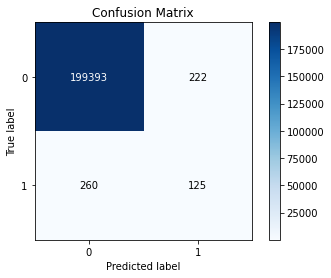

In [ ]:
X=X[0:200000]
Y=Y[0:200000]
from sklearn.ensemble import IsolationForest
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
iso_forest = IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,random_state=np.random.RandomState(42), verbose=0)
iso_forest.fit(X)
scores_prediction = iso_forest.decision_function(X)
y_pred_iso_forest = iso_forest.predict(X)
y_pred_iso_forest[y_pred_iso_forest == 1] = 0
y_pred_iso_forest[y_pred_iso_forest == -1] = 1
print('FOR UNSUPERVISED METHOD OVERSAMPLELED DATA:')
print("accuracy_score:{}\n".format(accuracy_score(Y, y_pred_iso_forest)))
print("f1 score:{}\n".format(f1_score(Y,y_pred_iso_forest)))
# scores_iso= cross_val_score(iso_forest, X, Y, cv=14)
# print("Cross-Validation Accuracy Scores:{}\n".format(scores_iso))
print(classification_report(Y,y_pred_iso_forest))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y,y_pred_iso_forest)

Area under the curve : 0.661782
Average precision-recall score RF: 0.11825796998390657


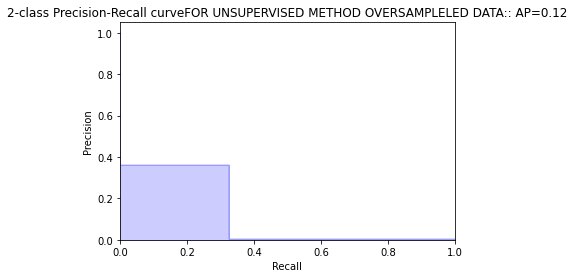

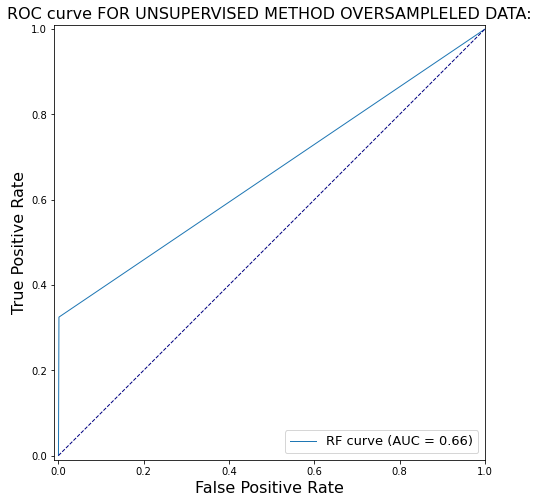

In [ ]:
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
average_precision = average_precision_score(Y,y_pred_iso_forest)
print("Area under the curve : %f" % (roc_auc_score(Y,y_pred_iso_forest)))
print("Average precision-recall score RF: {}".format(average_precision))


precision, recall, _ = precision_recall_curve(Y,y_pred_iso_forest)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curveFOR UNSUPERVISED METHOD OVERSAMPLELED DATA:: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(Y,y_pred_iso_forest)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve FOR UNSUPERVISED METHOD OVERSAMPLELED DATA:', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

accuracy_score:0.5006052534949217

f1 score:0.005618272328784374

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    284315
           1       0.82      0.00      0.01    284868

    accuracy                           0.50    569183
   macro avg       0.66      0.50      0.34    569183
weighted avg       0.66      0.50      0.34    569183



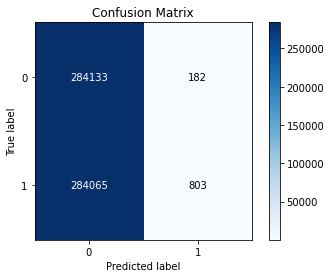

In [ ]:
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor
Fraud = df_oversampled[df_oversampled['Class']==1]
Valid = df_oversampled[df_oversampled['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
#iso_forest_oversampled = IsolationForest(n_estimators=100, max_samples=len(X_oversampled), contamination=outlier_fraction,random_state=np.random.RandomState(42), verbose=0)
iso_forest_oversampled = LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
#iso_forest_oversampled.fit(X_oversampled)
#scores_prediction_oversampled = iso_forest.decision_function(X_oversampled)
y_pred_iso_forest_oversampled = iso_forest.fit_predict(X_oversampled)
y_pred_iso_forest_oversampled[y_pred_iso_forest_oversampled == 1] = 0
y_pred_iso_forest_oversampled[y_pred_iso_forest_oversampled == -1] = 1
print("accuracy_score:{}\n".format(accuracy_score(Y_oversampled, y_pred_iso_forest_oversampled)))
print("f1 score:{}\n".format(f1_score(Y_oversampled,y_pred_iso_forest_oversampled)))
# scores_iso= cross_val_score(iso_forest, X, Y, cv=14)
# print("Cross-Validation Accuracy Scores:{}\n".format(scores_iso))
print(classification_report(Y_oversampled,y_pred_iso_forest_oversampled))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_oversampled,y_pred_iso_forest_oversampled)

BAR PLOTS:

In [ ]:
data=pd.DataFrame()
f=pd.DataFrame()
data['Logistic_Regression']=[0.9358,0.9664,0.9466]
f['Logistic_Regression']=[0.7904,0.93687,0.9450]
data['Linear_Regression']=[0.9988,0.8952,0.9163]
f['Linear_Regression']=[0.52,0.8888,0.9099]
data['ANN']=[0.9993,0.9256,0.9817]
f['ANN']=[0.7952,0.9266,0.9814]
data['SVM']=[0.9993,0.9391, 0.9487]
f['SVM']=[0.78294,0.9387,0.94717]
data['DecisionTree_Classifier']=[0.9991,0.9020,0.9994]
f['DecisionTree_Classifier']=[0.7292,0.9085,0.9994]
data['Isolation_Forest']=[0.9976,0.6595,0.9985]
f['Isolation_Forest']=[0.3208,0.4854,0.6415]



In [ ]:
data.index=['original_data','undersampled_data','oversampled_data']
data

,Logistic_Regression,Linear_Regression,ANN,SVM,DecisionTree_Classifier,Isolation_Forest
original_data,0.9358,0.9988,0.9993,0.9993,0.9991,0.9976
undersampled_data,0.9664,0.8952,0.9256,0.9391,0.9020,0.6595
oversampled_data,0.9466,0.9163,0.9817,0.9487,0.9994,0.9985


In [ ]:
f.index=['original_data','undersampled_data','oversampled_data']
f

,Logistic_Regression,Linear_Regression,ANN,SVM,DecisionTree_Classifier,Isolation_Forest
original_data,0.79040,0.5200,0.7952,0.78294,0.7292,0.3208
undersampled_data,0.93687,0.8888,0.9266,0.93870,0.9085,0.4854
oversampled_data,0.94500,0.9099,0.9814,0.94717,0.9994,0.6415


In [ ]:
ax = data.plot.bar(rot=0,ylim=(0.6,1),figsize=[9,9])
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
fig.savefig('comparative_accuracy_bar_plot')


Text(65.75, 0.5, 'accuracy')

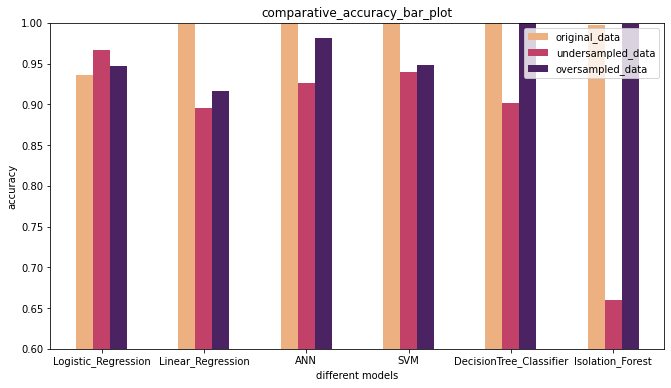

In [ ]:
ax = data.T.plot.bar(rot=0,ylim=(0.6,1),figsize=[11,6],title='comparative_accuracy_bar_plot',colormap='flare')
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
fig.savefig('comparative_accuracy_bar_plot')
ax.set_xlabel("different models")
ax.set_ylabel("accuracy")

Text(72.125, 0.5, 'f1_score')

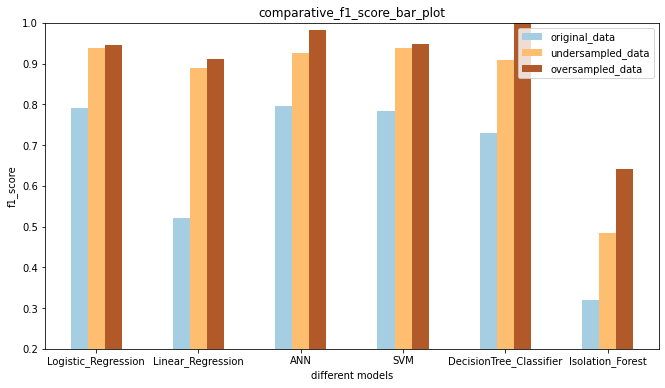

In [ ]:
ax = f.T.plot.bar(rot=0,ylim=(0.2,1),figsize=[11,6],title='comparative_f1_score_bar_plot',colormap='Paired')
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
fig.savefig('comparative_f1_score_bar_plot')
ax.set_xlabel("different models")
ax.set_ylabel("f1_score")

In [ ]:
data.T

,original_data,undersampled_data,oversampled_data
Logistic_Regression,0.9358,0.9664,0.9466
Linear_Regression,0.9988,0.8952,0.9163
ANN,0.9993,0.9256,0.9817
SVM,0.9993,0.9391,0.9487
DecisionTree_Classifier,0.9991,0.9020,0.9994
Isolation_Forest,0.9976,0.6595,0.9985


In [ ]:
f.T

,original_data,undersampled_data,oversampled_data
Logistic_Regression,0.79040,0.93687,0.94500
Linear_Regression,0.52000,0.88880,0.90990
ANN,0.79520,0.92660,0.98140
SVM,0.78294,0.93870,0.94717
DecisionTree_Classifier,0.72920,0.90850,0.99940
Isolation_Forest,0.32080,0.48540,0.64150


Text(0, 0.5, 'f1_score')

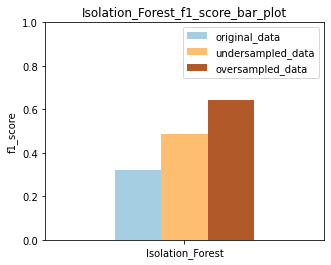

In [ ]:
ax = f.T[5:].plot.bar(rot=0,ylim=(0,1),figsize=[5,4],title='Isolation_Forest_f1_score_bar_plot',colormap='Paired')
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
#fig.savefig('comparative_f1_score_bar_plot')
#ax.set_xlabel("logistic_regression")
ax.set_ylabel("f1_score")

Text(18.125, 0.5, 'accuracy')

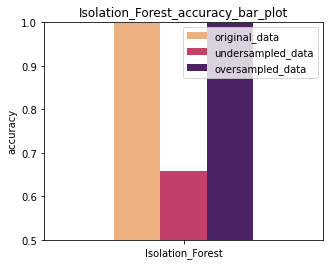

In [ ]:
ax = data.T[5:].plot.bar(rot=0,ylim=(0.5,1),figsize=[5,4],title='Isolation_Forest_accuracy_bar_plot',colormap='flare')
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
fig.savefig('comparative_accuracy_bar_plot')
#ax.set_xlabel("different models")
ax.set_ylabel("accuracy")

In [ ]:
import pandas as pd
AP=pd.DataFrame()
ROC=pd.DataFrame()
AP['Logistic_Regression']=[0.51,0.92,0.93]
ROC['Logistic_Regression']=[0.81,0.94,0.95]
AP['Linear_Regression']=[0.31,0.90,0.91]
ROC['Linear_Regression']=[0.69,0.90,0.92]
AP['ANN']=[0.64,0.90,0.98]
ROC['ANN']=[0.87,0.93,0.98]
AP['SVM']=[0.61,0.93,0.94]
ROC['SVM']=[0.87,0.94,0.95]
AP['DecisionTree_Classifier']=[0.53,0.86,1.00]
ROC['DecisionTree_Classifier']=[0.87,0.90,1.00]
AP['Isolation_Forest']=[0.12,0.66,0.69]
ROC['Isolation_Forest']=[0.66,0.66,0.67]
ROC.index=['original_data','undersampled_data','oversampled_data']
AP.index=['original_data','undersampled_data','oversampled_data']


In [ ]:
ROC.columns

Index(['Logistic_Regression', 'Linear_Regression', 'ANN', 'SVM',
       'DecisionTree_Classifier', 'Isolation_Forest'],
      dtype='object')

Text(72.125, 0.5, 'ROC_SCORE')

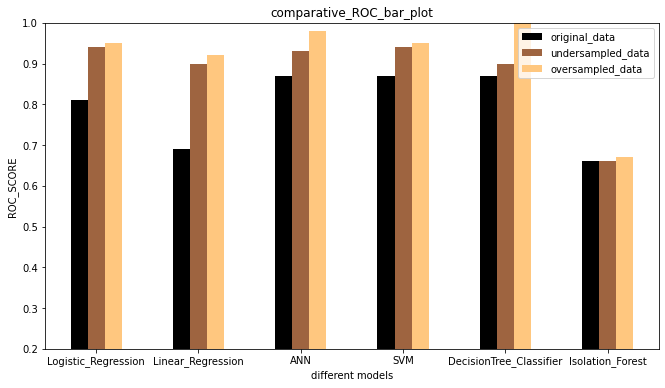

In [ ]:
ax = ROC.T.plot.bar(rot=0,ylim=(0.2,1),figsize=[11,6],title='comparative_ROC_bar_plot',colormap='copper')
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
fig.savefig('comparative_ROC_bar_plot')
ax.set_xlabel("different models")
ax.set_ylabel("ROC_SCORE")

Text(72.125, 0.5, 'AP_SCORE')

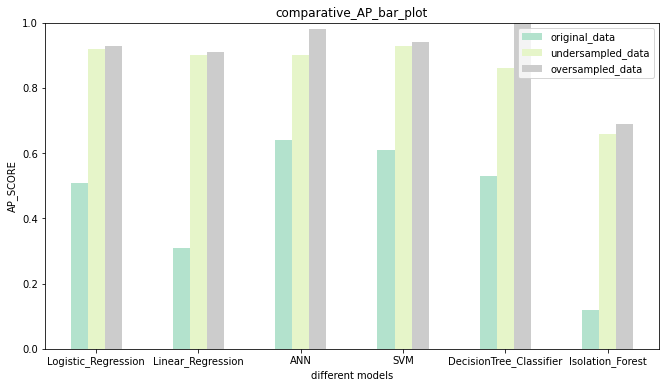

In [ ]:
ax = AP.T.plot.bar(rot=0,ylim=(0,1),figsize=[11,6],title='comparative_AP_bar_plot',colormap='Pastel2')
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
fig.savefig('comparative_AP_bar_plot')
ax.set_xlabel("different models")
ax.set_ylabel("AP_SCORE")

In [ ]:
ROC.T

,original_data,undersampled_data,oversampled_data
Logistic_Regression,0.81,0.94,0.95
Linear_Regression,0.69,0.90,0.92
ANN,0.87,0.93,0.98
SVM,0.87,0.94,0.95
DecisionTree_Classifier,0.87,0.90,1.00
Isolation_Forest,0.66,0.66,0.67


In [ ]:
AP.T

,original_data,undersampled_data,oversampled_data
Logistic_Regression,0.51,0.92,0.93
Linear_Regression,0.31,0.90,0.91
ANN,0.64,0.90,0.98
SVM,0.61,0.93,0.94
DecisionTree_Classifier,0.53,0.86,1.00
Isolation_Forest,0.12,0.66,0.69


Text(0, 0.5, 'ROC_SCORE')

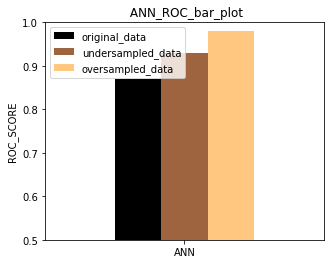

In [ ]:
ax = ROC.T[2:3].plot.bar(rot=0,ylim=(0.5,1),figsize=[5,4],title=' ANN_ROC_bar_plot',colormap='copper')
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
#fig.savefig('comparative_ROC_bar_plot')
#ax.set_xlabel("different models")
ax.set_ylabel("ROC_SCORE")

Text(0, 0.5, 'AP_SCORE')

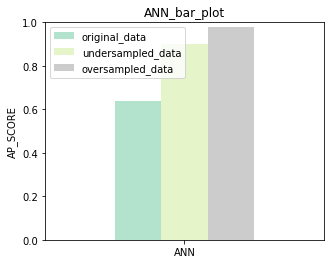

In [ ]:
ax = AP.T[2:3].plot.bar(rot=0,ylim=(0,1),figsize=[5,4],title='ANN_bar_plot',colormap='Pastel2')
#ax = bar_data.plot.bar(rot=0)
#ax.label_outer('comparative_accuracy_bar_plot')
fig=ax.get_figure()
#fig.savefig('comparative_AP_bar_plot')
#ax.set_xlabel("different models")
ax.set_ylabel("AP_SCORE")